## **Оглавление:**
- [Шаг 1. Откроем файл с данными и изучим общую информацию](#id-section1)<div id='id-section32'/>
- [Вывод](#id-section2)<div id='id-section33'/>


- [Шаг 2. Подготовим данные к анализу](#id-section3)<div id='id-section34'/>
- [Заменим названия столбцов](#id-section4)<div id='id-section35'/>
- [Заменим значения возрастного рейтинга на актуальные](#id-section5)<div id='id-section36'/>
- [Обработаем пропуски](#id-section6)<div id='id-section37'/>
- [Приведем данные к нужным типам](#id-section7)<div id='id-section38'/>
- [Обработаем дубликаты](#id-section8)<div id='id-section39'/>
- [Посчитаем суммарные продажи во всех регионах](#id-section9)<div id='id-section40'/>
- [Вывод](#id-section10)<div id='id-section41'/>


- [Шаг 3. Проведем исследовательский анализ данных](#id-section11)<div id='id-section42'/>
- [Посмотрим, сколько игр выпускалось в разные годы](#id-section12)<div id='id-section43'/>
- [Посмотрим, как менялись продажи по платформам](#id-section13)<div id='id-section44'/>
- [Отберем данные за актуальный период](#id-section14)<div id='id-section45'/>
- [Выберем потенциально прибыльные платформы](#id-section15)<div id='id-section46'/>
- [Построим диаграммы размаха по глобальным продажам игр в разбивке по платформам](#id-section16)<div id='id-section47'/>
- [Посмотрим, как влияют на продажи внутри платформ отзывы пользователей и критиков](#id-section17)<div id='id-section48'/>
- [Посмотрим на общее распределение игр по жанрам](#id-section18)<div id='id-section49'/>
- [Выделим самые прибыльные жанры и жанры с низкими продажами](#id-section19)<div id='id-section50'/>
- [Вывод](#id-section20)<div id='id-section51'/>


- [Шаг 4. Составим портрет пользователя каждого региона](#id-section21)<div id='id-section52'/>
- [Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5)](#id-section22)<div id='id-section53'/>
- [Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5)](#id-section23)<div id='id-section54'/>
- [Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе](#id-section24)<div id='id-section55'/>
- [Вывод](#id-section25)<div id='id-section56'/>


- [Шаг 5. Проверим гипотезы](#id-section26)<div id='id-section57'/>
- [Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#id-section27)<div id='id-section58'/>
- [Вывод](#id-section28)<div id='id-section59'/>
- [Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные](#id-section29)<div id='id-section60'/>
- [Вывод](#id-30)<div id='id-section61'/>


- [Шаг 6. Общий вывод](#id-section31)<div id='id-section62'/>

<div id='id-section1'/>

## [Шаг 1. Откроем файл с данными и изучим общую информацию](#id-section32)

Методы `head()` и `tail()` применять не будем, потому что Jupyter и так выведет на экран первые и последние 5 строк из таблицы.

Также сразу посмотрим, какие типы данных хранятся в таблице, воспользуемся методом `info()`.

In [1]:
from IPython.display import display

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats as st

df = pd.read_csv('games.csv')
display(df)
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div id='id-section2'/>

### [Вывод](#id-section33)

Таблица `df` - это объемный массив данных, в нем хранится более 16 тыс. строк. 

Названия всех столбцов содержат заглавные буквы. Для удобства имеет смысл привести названия к нижнему регистру.

На первый взгляд, в столбцах `Critic_Score`, `User_Score` и `Rating` очень много пропущенных значений. При вызове метода `info()` мы увидели, что пропуски есть также в столбцах `Name`, `Year_of_Release`, `Genre`. 

В столбцах присутствуют типы данных `float64` (для количественных переменных, например: миллионы проданных копий игры в Северной Америке, Европе, Японии, других странах, оценка критиков), `object` (для категориальных переменных: название игры, платформы, жанра, возрастной рейтинг).

Кроме того, мы заметили, что переменная `Year_of_Release` должна иметь тип данных `int64` (вместо `float64`), а переменная `User_Score` должна иметь тип данных `float64` (вместо `object`).

<div id='id-section3'/>

## [Шаг 2. Подготовим данные к анализу](#id-section34)

<div id='id-section4'/>

### [Заменим названия столбцов](#id-section35)

Приведем к нижнему регистру названия каждого столбца в таблице методом `lower()` и проверим.

In [2]:
df.columns = [col.lower() for col in df.columns]
display(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div id='id-section5'/>

### [Заменим значения возрастного рейтинга на актуальные](#id-section36)

До 1998 г. категория «E» («Everyone») называлась «K-A» («Kids to Adults»). Мы решили привести обе категории к одному названию, поэтому заменим `K-A` на `E` в столбце `rating` методом `replace()`.

In [3]:
df['rating'] = df['rating'].replace('K-A', 'E')

<div id='id-section6'/>

### [Обработаем пропуски](#id-section37)

Найдем долю пропущенных значений по каждому столбцу в `df`, для этого используем метод `isna().mean()`. Для наглядности отсортируем долю пропусков по убыванию методом `sort_values(ascending = False)`.

In [4]:
display(df.isna().mean().sort_values(ascending = False))

critic_score       0.513192
rating             0.404786
user_score         0.400897
year_of_release    0.016093
genre              0.000120
name               0.000120
other_sales        0.000000
jp_sales           0.000000
eu_sales           0.000000
na_sales           0.000000
platform           0.000000
dtype: float64

Мы видим, что наши предположения о количестве пропусков подтвердились - больше всего их в столбцах `critic_score`, `user_score` и `rating`. Среди **причин**, которые могли привести к их появлению, мы назовем:
- старый год выхода игры, когда еще не существовало никакой единой системы оценивания игр;
- выход игры на маленький рынок какой-то одной страны (как следствие, не была завоевана популярность и известность, критики и пользователи не обратили на нее внимание и не стали оценивать);
- игры с рейтингом «RP», которые были отправлены в ESRB и ожидают присвоения рейтинга, например, в демо-версиях игр до официальной даты выпуска в продажу.

В столбцах `name`, `year_of_release`, `genre` доля пропусков маленькая, но их наличие, по нашему мнению, **объясняется** тем, что:
- при заполнении формы для сбора данных были допущены ошибки, вследствие чего столбцы оказались незаполненными (человеческий фактор);
- игра настолько старая, что восстановить данные по ней (жанр и год выпуска) невозможно.

Нам известно, что в столбцах с рейтингом есть **аббревиатура `tbd`** - это значит, что значения в ячейке в настоящий момент нет, но оно будет заполнено, когда появятся соответствующие данные (to be done). 

Учитывая, что столбцов с рейтингом у нас 2 (`critic_score` и `user_score`), но только `user_score` имеет тип данных `object`, мы сделаем предположение, что аббревиатура `tbd` находится именно там.

Проверим, какие значения содержатся в столбце `user_score`, методом `value_counts()`.

In [5]:
display(df['user_score'].value_counts())

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.9       2
1.1       2
1         2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Наши предположения подтвердились, в столбце `user_score` больше всего значений составляет аббревиатура `tbd`. 

В связи с тем, что так обозначаются отсутствующие значения, мы приняли решение заменить их на `NaN` методом `replace()`. 

In [6]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

Посмотрим, как теперь изменилась доля пропусков в таблице с данными. 

In [7]:
display(df.isna().mean().sort_values(ascending = False))

user_score         0.545917
critic_score       0.513192
rating             0.404786
year_of_release    0.016093
genre              0.000120
name               0.000120
other_sales        0.000000
jp_sales           0.000000
eu_sales           0.000000
na_sales           0.000000
platform           0.000000
dtype: float64

Столбец `user_score` после замены `tbd` на `NaN` вышел на 1 место. `critic_score` и `rating` спустились на 2 и 3 места. 

Мы не можем предположить подходящих значений, которыми можно было бы **заполнить эти пропуски**, ведь практически всегда значения отсутствуют во всех трех столбцах сразу, и нам не от чего оттолкнуться для заполнения пропусков. Следовательно, мы принимаем решение оставить отсуствующие значения во всех трех столбцах.

Что касается столбцов `year_of_release`, `genre` и `name`, то доля пропусков в них маленькая, поэтому мы удалим их методом `dropna()`.

In [8]:
df = df.dropna(subset=['year_of_release', 'genre', 'name'])

<div id='id-section7'/>

### [Приведем данные к нужным типам](#id-section38)

Переменная `year_of_release` должна иметь тип данных `int64` (вместо `float64`), так как год выпуска игры может быть только целочисленным. Для преобразования используем метод `astype()`. 

In [9]:
df['year_of_release'] = df['year_of_release'].astype('int64')

Переменная `user_score` должна иметь тип данных `float64` вместо `object`, так как оценки пользователей могут быть только численными (по аналогии с оценками критиков - дробными числами). Для преобразования используем метод `astype()`. 

In [10]:
df['user_score'] = df['user_score'].astype('float64')

Проверим типы данных.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


<div id='id-section8'/>

### [Обработаем дубликаты](#id-section39)

На всякий случай поищем дубликаты в данных методом `duplicated().sum()`, что позволит нам посчитать общее количество дубликатов в таблице.

In [12]:
display(df.duplicated().sum())

0

<div id='id-section9'/>

### [Посчитаем суммарные продажи во всех регионах](#id-section40)

Запишем их в отдельный столбец `all_sales`.

In [13]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<div id='id-section10'/>

### [Вывод](#id-section41)

На данном этапе мы:
- привели к нижнему регистру названия столбцов;
- заменили устаревшее значение возрастного рейтинга на актуальное;
- удалили пропущенные значения из столбцов `name`, `year_of_release` и `genre`;
- оставили пропущенные значения в столбцах `critic_score`, `user_score` и `rating`;
- избавились от аббревиатуры `tbd` в переменной `user_score`;
- преобразовали данные в столбцах `year_of_release` и `user_score` к нужным типам;
- проверили таблицу на наличие дубликатов;
- посчитали суммарные продажи во всех регионах и записали их в отдельную переменную `all_sales`.

<div id='id-section11'/>

## [Шаг 3. Проведем исследовательский анализ данных](#id-section42)

<div id='id-section12'/>

### [Посмотрим, сколько игр выпускалось в разные годы](#id-section43)

Методом `value_counts()` посмотрим, сколько значений (игр) соответствует каждому году. Отсортируем значения по убыванию методом `sort_values(ascending = False)`. 

In [14]:
display(df['year_of_release'].value_counts().sort_values(ascending = False))

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

Мы видим, что в 80-е и 90-е гг. выпускалось очень мало игр. 

В 2000 г. началась тенденция к возрастанию количества игр, в 2008 г. было достигнуто максимальное значение по выпущенным играм, после чего начался постепенный спад вплоть до 2013 г. 

После 2013 г. снова начинается повышение. При этом нам известно, что данные за 2016 г. неполные, поэтому логично предположить, что 2016 г. обгонит 2015 г., и тенденция к повышению сохранится. 

<div id='id-section13'/>

### [Посмотрим, как менялись продажи по платформам](#id-section44)

Выберем 10 платформ с наибольшими суммарными продажами. Для этого соберем сводную таблицу  методом `pivot_table()`, которую сгруппируем по платформам, а значения будут суммироваться по общим продажам `all_sales`. Отсортируем таблицу по убыванию и выведем первые 10 строк методом `head(10)`.

In [15]:
top_10_platforms = df.pivot_table(index = 'platform', values = 'all_sales', aggfunc = sum)\
        .sort_values(by = 'all_sales', ascending = False).head(10).reset_index()

display(top_10_platforms)

,platform,all_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Построим распределение 10 самых популярных платформ по годам. Для этого возьмем из данных срез, в который попадут платформы из топ-10, затем соберем сводную таблицу по годам и платформам, а в значения передадим суммы по общим продажам. График будет построен методом `plot()`, диапазон отображения графика мы решили ограничить 1990-м годом. 

Для удобства мы автоматизируем построение этого графика через функцию, чтобы потом вызывать его для других задач.

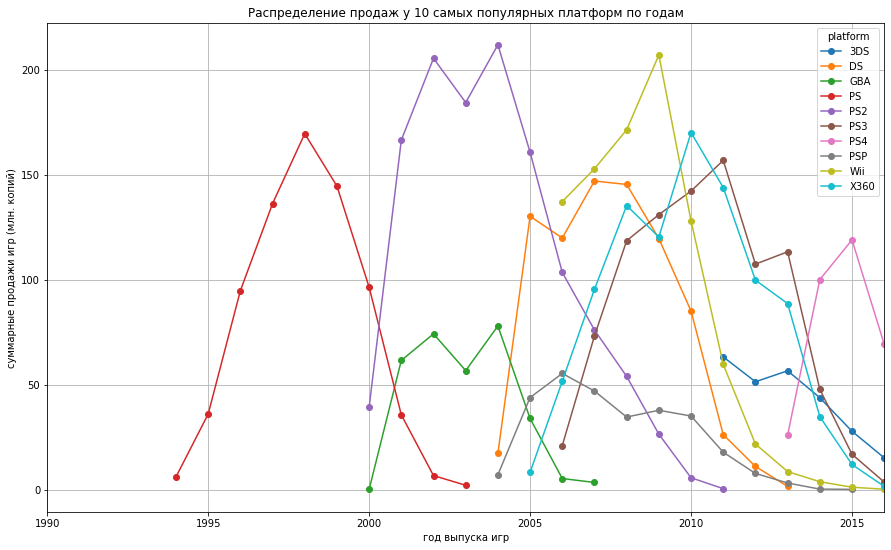

In [16]:
parameters = {
    'df': df.query('platform in @top_10_platforms.platform'),
    'title': 'Распределение продаж у 10 самых популярных платформ по годам',
    'xlim': (1990, 2016)
}

def platforms_to_plot(parameters):
    ax = parameters.get('df')\
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'all_sales', aggfunc = sum)\
    .plot(title = parameters.get('title'), style = 'o-', xlim = parameters.get('xlim'), grid = True, figsize = (15, 9))
    ax.set_xlabel('год выпуска игр')
    ax.set_ylabel('суммарные продажи игр (млн. копий)')
    plt.show()

platforms_to_plot(parameters)    

Мы видим, что какие-то гиганты из топ-10 уже отжили свой век (PS, PS2, DS, GBA), остальные продолжают выдавать продажи вплоть до 2016 г. (с поправкой на то, что эти данные неполные).

**Характерный срок жизни платформ** составляет от 7 до 11 лет.

<div id='id-section14'/>

### [Отберем данные за актуальный период](#id-section45)

В результате исследования предыдущих вопросов мы приняли решение определить актуальный период от 2010 до 2016 гг., так как данные по этим годам определяют общую тенденцию к уменьшению продаж игр по всем платформам, что поможет построить прогноз на 2017 г. Данные до 2010 г. в дальнейшей работе учитываться не будут.

In [17]:
actual_df = df.query('year_of_release >= 2010')

<div id='id-section15'/>

### [Выберем потенциально прибыльные платформы](#id-section46)

Чтобы определить, какие платформы лидируют по продажам, растут и падают, нам нужно вызвать график через написанную нами ранее функцию, но только теперь он будет строиться по всем платформам, которые существовали на протяжении актуального периода `actual_df`.

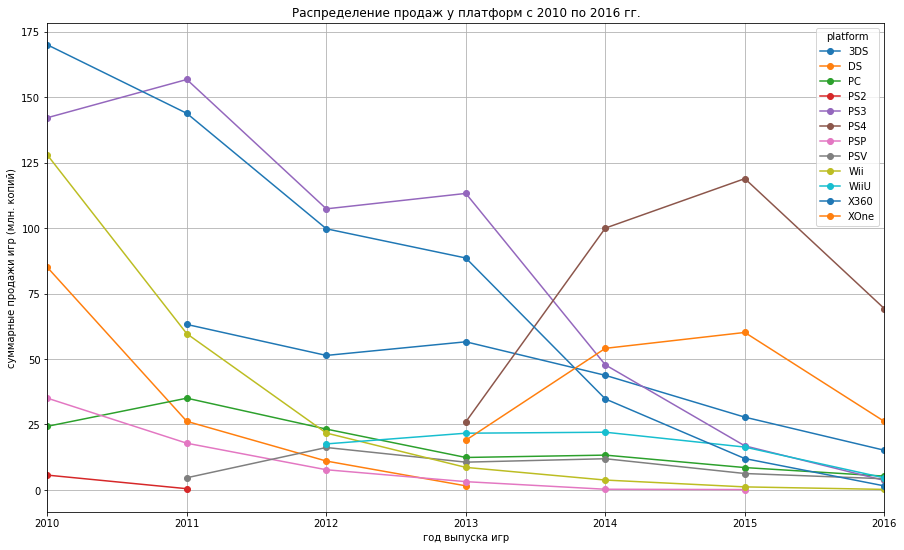

In [18]:
parameters = {
    'df': actual_df,
    'title': 'Распределение продаж у платформ c 2010 по 2016 гг.'
}

platforms_to_plot(parameters)

Лидерами продаж за актуальный период были X360 и PS3, но к 2016 г. они потеряли свои позиии. Даже если учесть, что данные за 2016 г. неполные, вряд ли эти платформы смогли выбраться из падения.

**Потенциально прибыльными** платформами мы считаем PS4, XOne и 3DS. Несмотря на то, что они тоже имеют тенденцию к падению, они еще далеко до "дна" (с поправкой на то, что данные за 2016 г. неполные).

<div id='id-section16'/>

### [Построим диаграммы размаха по глобальным продажам игр в разбивке по платформам](#id-section47)

За основу возьмем принцип построения сводной таблицы, который мы уже использовали ранее. Диаграммы размаха вызовем методом `boxplot()`.

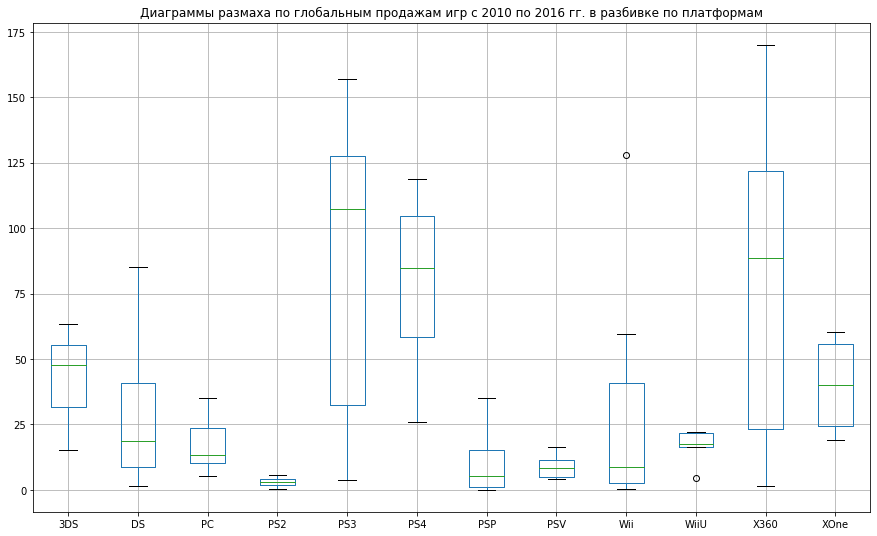

In [19]:
actual_df.pivot_table(index = 'year_of_release', columns = 'platform', values = 'all_sales', aggfunc = sum)\
.boxplot(figsize = (15, 9)).set_title\
('Диаграммы размаха по глобальным продажам игр c 2010 по 2016 гг. в разбивке по платформам')
plt.show()

Как и на предыдущем графике, мы отчетливо видим, что лидерами продаж за актуальный период были X360 и PS3 (но из предыдущего графика мы уже знаем, что в 2016 г. они потеряли свои позиии). По медианым продажам PS3 обогнала X360. При этом распределение значений асимметрично, перекос идет в сторону больших значений, то есть эти платформы выдавали большие продажи.

Потенциально прибыльные платформы PS4, XOne и 3DS обгоняют конкурентов (особенно PS4). При этом медианые продажи у PS4 приближаются к медианым продажам одного из исторических лидеров - X360.

<div id='id-section17'/>

### [Посмотрим, как влияют на продажи внутри платформ отзывы пользователей и критиков](#id-section48)

Для **двух исторических лидеров (X360 и PS3)** и **двух потенциально прибыльных платформ (PS4 и XOne)** построим диаграммы рассеяния методом `scatter_matrix()` и посчитаем коэффициенты корреляции Спирмена между отзывами (`critic_score` и `user_score`) и продажами `all_sales`. 

Коэффициент корреляции Спирмена мы используем по причине того, что он более устойчив к выбросам в данных и к нелинейным зависимостям, в отличие от Пирсона.

Чтобы автоматизировать построение диаграмм и вывод коэффициентов, создадим словари параметров, напишем функцию и запустим функцию для каждого параметра.

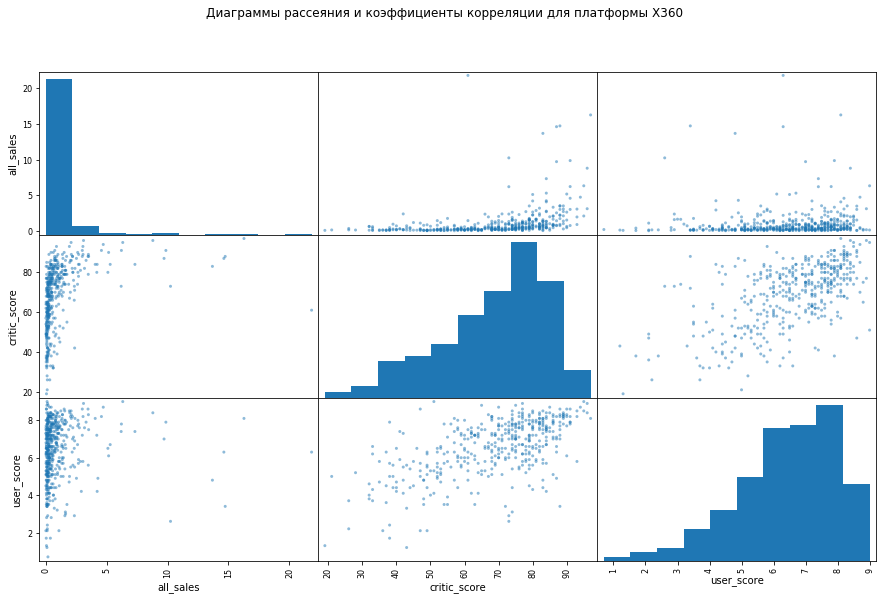

,all_sales,critic_score,user_score
all_sales,1.000000,0.634230,0.233862
critic_score,0.634230,1.000000,0.564681
user_score,0.233862,0.564681,1.000000


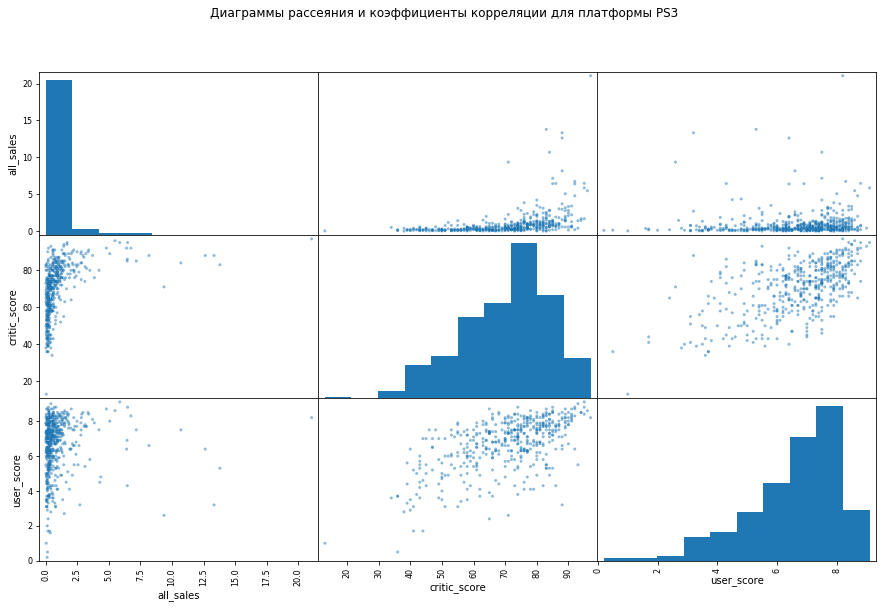

,all_sales,critic_score,user_score
all_sales,1.000000,0.646899,0.229171
critic_score,0.646899,1.000000,0.547833
user_score,0.229171,0.547833,1.000000


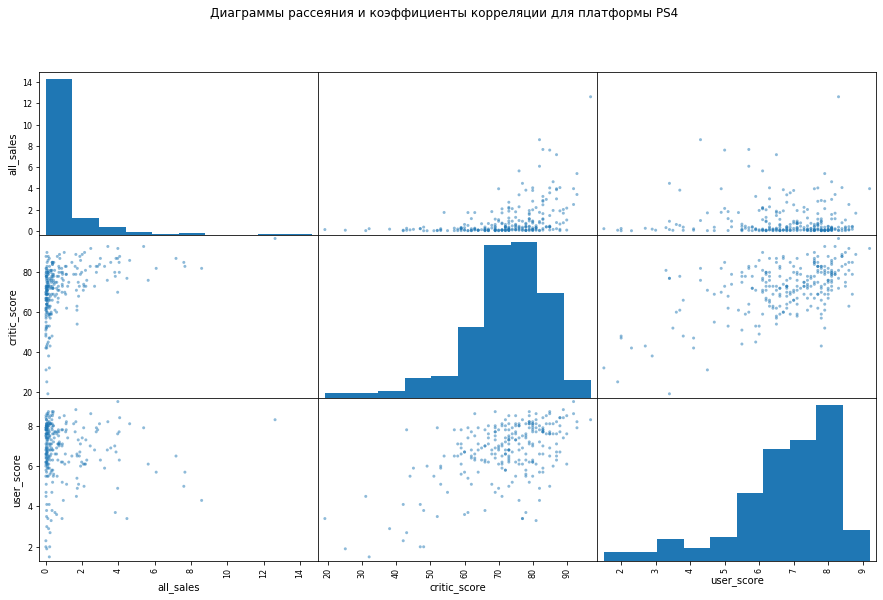

,all_sales,critic_score,user_score
all_sales,1.000000,0.508238,-0.028340
critic_score,0.508238,1.000000,0.433309
user_score,-0.028340,0.433309,1.000000


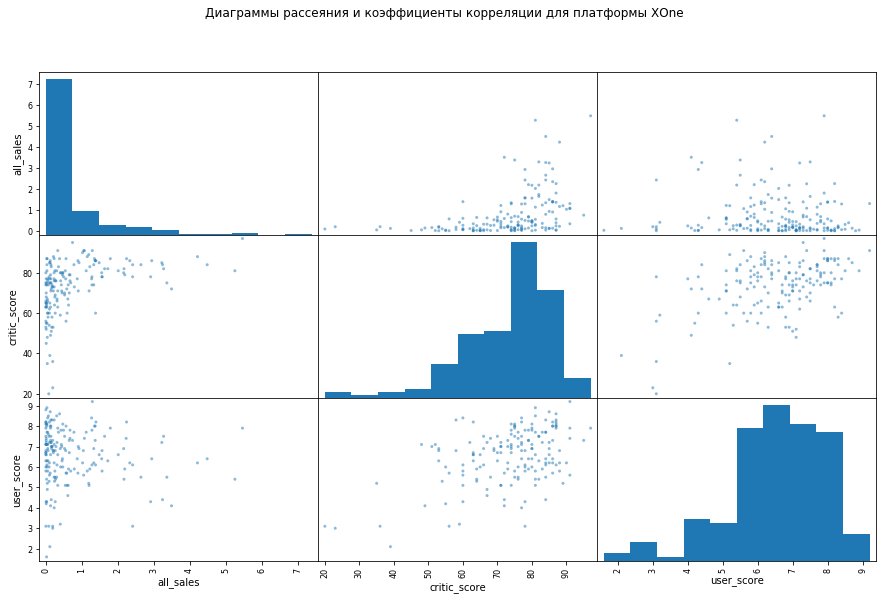

,all_sales,critic_score,user_score
all_sales,1.000000,0.531578,-0.100048
critic_score,0.531578,1.000000,0.346932
user_score,-0.100048,0.346932,1.000000


In [20]:
parameters = [
    {
        'df': actual_df.query('platform == "X360"'),
        'title': 'Диаграммы рассеяния и коэффициенты корреляции для платформы X360'
    },
    {
        'df': actual_df.query('platform == "PS3"'),
        'title': 'Диаграммы рассеяния и коэффициенты корреляции для платформы PS3'
    },
    {
        'df': actual_df.query('platform == "PS4"'),
        'title': 'Диаграммы рассеяния и коэффициенты корреляции для платформы PS4'
    },
    {
        'df': actual_df.query('platform == "XOne"'),
        'title': 'Диаграммы рассеяния и коэффициенты корреляции для платформы XOne'
    }
]

def matrix_and_corr(parameters):
    df = parameters.get('df')
    column_names = ['all_sales', 'critic_score', 'user_score']
    pd.plotting.scatter_matrix(df[column_names], figsize=(15, 9))
    plt.suptitle(parameters.get('title'))
    plt.show()
    display(df[column_names].corr(method='spearman'))

for parameter in parameters:
    matrix_and_corr(parameter)

Для двух исторических лидеров (X360 и PS3) и двух потенциально прибыльных платформ (PS4 и XOne) отзывы критиков оказывают влияние на продажи (чем выше оценка критиков, тем выше продажи), а вот для отзывов пользователей такой связи не прослеживается:
- коэффициенты корреляции между переменными critic_score и all_sales для платформы X360 и PS3 равны 0.6, для PS4 и XOne равны 0.5 - это свидетельствует о наличии прямой связи между переменными;
- коэффициенты корреляции между переменными user_score и all_sales для платформ X360 и PS3 равны 0.2, для PS4 равны -0.02, а для XOne -0.1 - это указывает на практическое отсутствие связи между переменными.

На матрицах диаграмм корреляции видно, что у платформ X360 и PS3 оценки критиков и пользователей находятся в одной плоскости, а у PS4 и XOne разброс оценок очень сильный. Возможно, это связано с тем, что у аудитории потенциально прибыльных платформ еще не сформировалось единогласное мнение о том, насколько они хороши.

Также на матрицах диаграмм корреляции прослеживается тенденция к прямой связи между оценками критиков и пользователей (чем выше оценка критиков, тем выше оценка пользователей). Это подтверждается коэффициентами корреляции.

Мы можем предположить, что при покупке игр пользователи ориентируются на оценки критиков, а не на оценки других пользователей. Это значит, что отзывам критиков доверяют сильнее. 

<div id='id-section18'/>

### [Посмотрим на общее распределение игр по жанрам](#id-section49)

Сгруппируем таблицу `actual_df` по жанрам и для каждого жанра подсчитаем количество игр методом `count()`. Для удобства отсортируем значения через `sort_values()`. Учитывая то, что график будет построен методом `plot()` с типом `barh`, сортировка в результате будет произведена по убыванию, и мы получим удобный график (построен ниже).

<div id='id-section19'/>

### [Выделим самые прибыльные жанры и жанры с низкими продажами](#id-section50)

Сгруппируем таблицу `actual_df` по жанрам и для каждого жанра подсчитаем суммарные продажи методом `sum()`. Снова отсортируем значения через `sort_values()`. Учитывая то, что график будет построен методом `plot()` с типом `barh`, сортировка в результате будет произведена по убыванию, и мы получим удобный график.

Для наглядности **совместим оба графика** на одной оси методом `subplots()`.

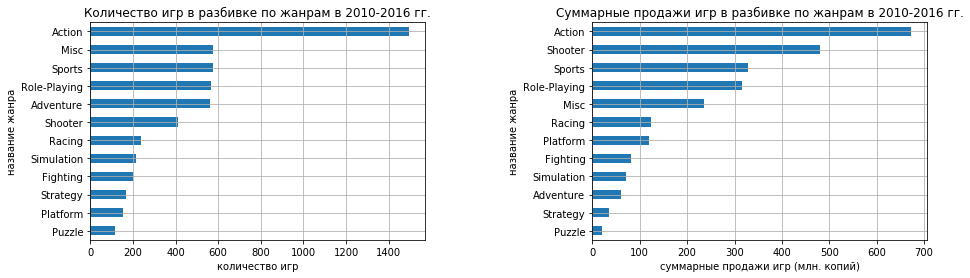

In [21]:
fig, (a, b) = plt.subplots(1, 2, figsize=(15, 4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=1)
actual_df.groupby('genre')['name'].count().sort_values()\
.plot(kind = 'barh', title = 'Количество игр в разбивке по жанрам в 2010-2016 гг.', grid = True, ax = a)
a.set_xlabel('количество игр')
a.set_ylabel('название жанра')

actual_df.groupby('genre')['all_sales'].sum().sort_values()\
.plot(kind = 'barh', title = 'Суммарные продажи игр в разбивке по жанрам в 2010-2016 гг.', grid = True, ax = b)
b.set_xlabel('суммарные продажи игр (млн. копий)')
b.set_ylabel('название жанра')
plt.show()

- Мы видим, что в жанре **Action** выпускается подавляющее большинство игр, одновременно с этим данный жанр самый прибыльный.

- Игр в жанре **Shooter** выпускается не очень много, но продажи у этого жанра большие, так что этот жанр тоже можно считать прибыльным.

- Игры в жанрах **Sports** и **Role-Playing** занимают 3 и 4 позиции как по количеству выпущенных игр, так и по уровню продаж.

- Игр в жанре **Miscellaneous** (относятся к категории Skill-and-action game) выпускается много, но продажи у них не очень большие. То же самое можно сказать и о жанре **Adventure**. 

- Игры, у которых меньше всего продаж, относятся к жанрам **Puzzle** и **Strategy**. Мы можем сделать вывод, что эти жанры самые непопулярные. 

<div id='id-section20'/>

### [Вывод](#id-section51)

На данном этапе мы выяснили, что **характерный срок жизни** игровых платформ составляет от 7 до 11 лет. 

Лидерами продаж за **актуальный период** (2010-2016 гг.) были X360 и PS3, но к 2016 г. они потеряли свои позиии. Потенциально **прибыльными платформами** мы считаем PS4, XOne и 3DS. Несмотря на то, что они тоже имеют тенденцию к падению, они еще далеко до "дна" (с поправкой на то, что данные за 2016 г. неполные).

Для двух исторических лидеров (X360 и PS3) и двух потенциально прибыльных платформ (PS4 и XOne) отзывы критиков оказывают **влияние на продажи** (чем выше оценка критиков, тем выше продажи), а вот для отзывов пользователей такой связи не прослеживается. Мы можем предположить, что при покупке игр пользователи ориентируются на оценки критиков, а не на оценки других пользователей. Это значит, что отзывам критиков доверяют сильнее. 

Важно отметить, что у аудитории потенциально прибыльных платформ еще не сформировалось единогласное мнение о том, насколько они хороши, поэтому **разброс оценок** критиков и пользователей очень большой.

Также мы смогли проследить тенденцию к прямой связи между оценками критиков и пользователей (чем выше оценка критиков, тем выше оценка пользователей). 

Самым **распространенным** и **прибыльным** жанром является Action. Жанр Shooter тоже можно считать прибыльным (игр выпускается не очень много, а продажи большие).

Игры, у которых меньше всего продаж, относятся к жанрам Puzzle и Strategy. Мы можем сделать вывод, что эти жанры самые **непопулярные**.

<div id='id-section21'/>

## [Шаг 4. Составим портрет пользователя каждого региона](#id-section52)

<div id='id-section22'/>

### [Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5)](#id-section53)

Сгруппируем таблицу `actual_df` по платформам и для каждой платформы посчитаем продажи поочередно по `na_sales`, `eu_sales` и `jp_sales` методом `sum()`. Отсортируем значения через `sort_values()`. Учитывая то, что график будет построен методом `plot()` с типом `barh`, сортировка в результате будет произведена по убыванию, а топ-5 платформ мы получим методом `tail()` (а не `head()`). График будет построен ниже.

<div id='id-section23'/>

### [Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5)](#id-section54)

Принцип группировки таблицы и построения графика такой же, только сама группировка будет происходить по жанрам.  

<div id='id-section24'/>

### [Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе](#id-section55)

Принцип группировки таблицы и построения графика такой же, только сама группировка будет происходить по возрастному рейтингу.

Для удобства и наглядности мы **выведем на одной оси все три графика** по каждому региону методом `subplots()`, так нам будет легче произвести сравнение.

Для этого мы должны создать массив словарей с уникальными параметрами, функцию для построения трех графиков и цикл для перебора каждого параметра. 

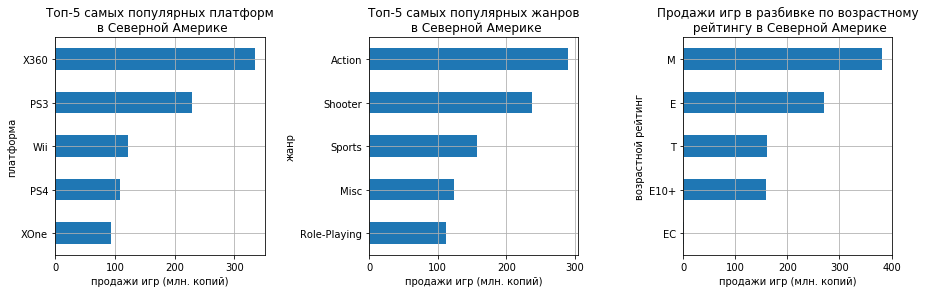

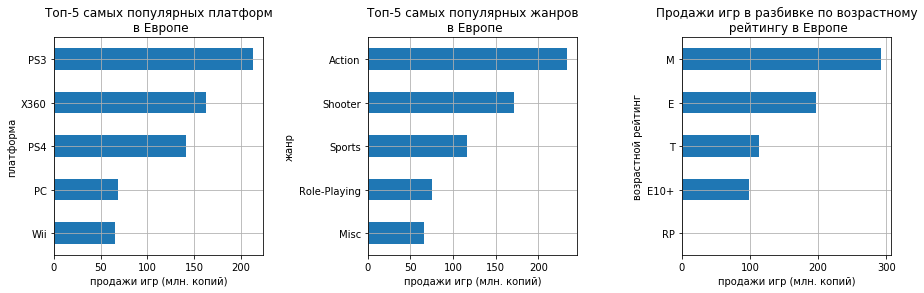

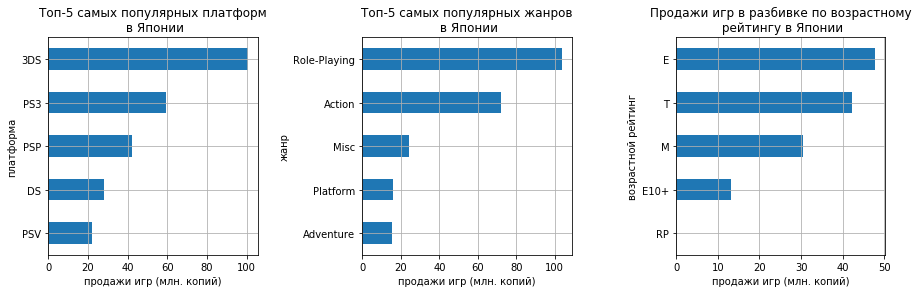

In [22]:
parameters = [
    {
        'column': 'na_sales',
        'title1': 'Топ-5 самых популярных платформ\n в Северной Америке',
        'title2': 'Топ-5 самых популярных жанров\n в Северной Америке',
        'title3': 'Продажи игр в разбивке по возрастному\n рейтингу в Северной Америке'
    },
    {
        'column': 'eu_sales',
        'title1': 'Топ-5 самых популярных платформ\n в Европе',
        'title2': 'Топ-5 самых популярных жанров\n в Европе',
        'title3': 'Продажи игр в разбивке по возрастному\n рейтингу в Европе'
    },
    {
        'column': 'jp_sales',
        'title1': 'Топ-5 самых популярных платформ\n в Японии',
        'title2': 'Топ-5 самых популярных жанров\n в Японии',
        'title3': 'Продажи игр в разбивке по возрастному\n рейтингу в Японии'
    }
]

def top_5(parameters):
    fig, (a, b, c) = plt.subplots(1, 3, figsize=(15, 4))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
    actual_df.groupby('platform')[parameters.get('column')].sum().sort_values().tail()\
    .plot(kind = 'barh', title = parameters.get('title1'), grid = True, ax = a)
    a.set_xlabel('продажи игр (млн. копий)')
    a.set_ylabel('платформа')
    
    actual_df.groupby('genre')[parameters.get('column')].sum().sort_values().tail()\
    .plot(kind = 'barh', title = parameters.get('title2'), grid = True, ax = b)
    b.set_xlabel('продажи игр (млн. копий)')
    b.set_ylabel('жанр')
    
    actual_df.groupby('rating')[parameters.get('column')].sum().sort_values().tail()\
    .plot(kind = 'barh', title = parameters.get('title3'), grid = True, ax = c)
    c.set_xlabel('продажи игр (млн. копий)')
    c.set_ylabel('возрастной рейтинг')
    plt.show()

for parameter in parameters:
    top_5(parameter)

<div id='id-section25'/>

### [Вывод](#id-section56)

Пользователи в **Северной Америке**:
- в качестве игровой платформы выбирают X360 производства американской компании Microsoft (на втором месте по популярности PS3);
- чаще всего играют в игры жанров Action, Shooter или Sports;
- возрастной рейтинг игр «M» - «Для взрослых» или «E» — «Для всех».

Пользователи в **Европе**:
- в отличие от Северной Америки, в качестве игровой платформы выбирают японскую PS3 (а X360 на втором месте). Также некоторые пользователи играют на PC, чего в Северной Америке не наблюдается;
- играют в игры жанров Action, Shooter или Sports, что повторяет вкусы аудитории из Северной Америки;
- возрастной рейтинг игр снова повторяет предпочтения пользователей из Северной Америки: «M» - «Для взрослых» или «E» — «Для всех».

Пользователи в **Японии**:
- в качестве игровой платформы выбирают 3DS (так как это японского производства), а второе место занимает PS3, которая также популярна в Европе и Северной Америке;
- чаще всего играют в игры жанра Role-Playing (этот жанр входит в топ-5 в Северной Америке и Европе, но все же не так популярен). Второе место занимает жанр Action, что в целом повторяет тенденцию для всех регионов. Также в Японии в топ-5 входят жанры Platform и Adventure, которые не пользуются популярностью в Северной Америке и Европе;
- возрастной рейтинг игр «E» — «Для всех» или «T» — «Подросткам». Это значит, что в Японии аудитория игроков младше, чем в Северной Америке и Европе. Об этом свидетельствует и то, что доля игр с рейтингом «M» - «Для взрослых» меньше, чем в других регионах.

Мы можем отметить, что пользователи из Северной Америки и Японии поддерживают отечественные компании, выпускающие игровые консоли. 

При этом у пользователей из Северной Америки и Европы схожие вкусы относительно игровых жанров. Возрастная аудитория также совпадает - в основном покупают игры для взрослых. Возможно, сходство объясняется общим культурным кодом и менталитетом пользователей из этих частей света.

Пользователи из Японии разительно отличаются, выбирая игры жанров Role-Playing, Platform и Adventure. Также мы предполагаем, что аудитория игроков из Японии младше, чем в Северной Америке и Европе. 

<div id='id-section26'/>

## [Шаг 5. Проверим гипотезы](#id-section57)

<div id='id-section27'/>

### [Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#id-section58)

В связи с тем, что пользователи платформ Xbox One и PC - это разные люди, мы не можем сказать, что перед нами зависимые (парные) выборки. Следовательно, нам нужно проверить гипотезу о равенстве средних для двух разных выборок.

- **Гипотезу H₀ сформулируем так:** средние пользовательские рейтинги платформ Xbox One и PC равны (то есть одинаковые).
- **Гипотеза H₁:** средние пользовательские рейтинги платформ Xbox One и PC различаются.

Для проверки гипотезы **H₀** мы проведем t-тест методом `scipy.stats.ttest_ind()` из библиотеки `scipy.stats`, куда передадим два среза данных с рейтингами пользователей по платформам Xbox One и PC. 

**Критический уровень статистической значимости** зададим значением 0.05 (5%), так как мы доверяем этому общепринятому пороговому значению. 

- Если наблюдаемое на выборках значение `pvalue` попадет в эту зону, у нас будет основание отвергнуть нулевую гипотезу.

- Если значение `pvalue` попадет в зону «Не получилось отвергнуть нулевую гипотезу», то оснований отвергать нулевую гипотезу нет. Будем считать, что эмпирически полученные данные не противоречат H₀.

Однако прежде чем произвести проверку гипотез через t-критерий Стьюдента, сделаем проверку дисперсий выборок, чтобы понять, с каким параметром `equal_var` (`True` или `False`) использовать метод проверки `ttest_ind`.

In [24]:
xbox_user_score = actual_df.query('platform == "XOne"')['user_score']
pc_user_score = actual_df.query('platform == "PC"')['user_score']

display([np.var(x, ddof=1) for x in [xbox_user_score, pc_user_score]])

[1.9069968429360695, 2.4504460151108947]

In [25]:
alpha = 0.05 

results = st.ttest_ind(xbox_user_score, pc_user_score, equal_var = False, nan_policy='omit')

display('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу') 

'p-значение:'

0.980163412912197

'Не получилось отвергнуть нулевую гипотезу'

<div id='id-section28'/>

### [Вывод](#id-section59)

- Судя по полученному значению `pvalue` (0.98), это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами.
- Таким образом, эмпирически полученные данные **не противоречат гипотезе H₀**, и мы можем считать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые (возможно, это объясняется тем, что игры, выпускаемые для этих двух платформ, имеют одинаковое качество, что нивелирует разницу в оценках).

<div id='id-section29'/>

### [Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные](#id-section60)

В связи с тем, что полученные данные не дают нам основания считать, что игроки жанров Action и Sports - это одни и те же люди, мы не можем сказать, что перед нами зависимые (парные) выборки. Таким образом, мы будем проверять гипотезу о равенстве средних для двух разных выборок.

- **Гипотезу H₀ сформулируем так:** средние пользовательские рейтинги жанров Action и Sports равны (то есть не различаются).
- **Гипотеза H₁:** средние пользовательские рейтинги жанров Action и Sports различаются.

Для проверки гипотезы **H₀** мы проведем t-тест методом `scipy.stats.ttest_ind()` из библиотеки `scipy.stats`, куда передадим два среза данных с рейтингами пользователей по жанрам Action и Sports. 

**Критический уровень статистической значимости** зададим значением 0.05 (5%), так как мы доверяем этому общепринятому пороговому значению. 

- Если наблюдаемое на выборках значение `pvalue` попадет в эту зону, у нас будет основание отвергнуть нулевую гипотезу.

- Если значение `pvalue` попадет в зону «Не получилось отвергнуть нулевую гипотезу», то оснований отвергать нулевую гипотезу нет. Будем считать, что эмпирически полученные данные не противоречат H₀.

Однако прежде чем произвести проверку гипотез через t-критерий Стьюдента, сделаем проверку дисперсий выборок, чтобы понять, с каким параметром `equal_var` (`True` или `False`) использовать метод проверки `ttest_ind`.

In [26]:
action_user_score = actual_df.query('genre == "Action"')['user_score']
sports_user_score = actual_df.query('genre == "Sports"')['user_score']

display([np.var(x, ddof=1) for x in [action_user_score, sports_user_score]])

[1.8501475426606517, 2.8356344151248605]

In [27]:
alpha = 0.05 

results = st.ttest_ind(action_user_score, sports_user_score, equal_var = False, nan_policy='omit')

display('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу') 

'p-значение:'

1.4516152467841647e-15

'Отвергаем нулевую гипотезу'

<div id='id-section30'/>

### [Вывод](#id-section61)

- Полученное значение `pvalue` дает нам основание **отвергнуть гипотезу H₀** о равенстве средних пользовательских рейтингов жанров Action и Sports. 
- Следовательно, эмпирически полученные данные **не противоречат гипотезе H₁**, и средние пользовательские рейтинги жанров Action и Sports все-таки различаются (что логично, ведь мы уже выяснили, что Action - это самый популярный и прибыльный жанр, а Sports от него отстает).

<div id='id-section31'/>

## [Шаг 6. Общий вывод](#id-section62)

Мы выяснили, что характерный срок жизни игровых платформ составляет от 7 до 11 лет.

Потенциально прибыльными платформами мы считаем PS4, XOne и 3DS. Несмотря на то, что они имеют тенденцию к падению, им еще далеко до "дна" (с поправкой на то, что данные за 2016 г. неполные).

Также нам удалось установить, что при покупке игр пользователи ориентируются на оценки критиков, а не на оценки других пользователей. Это значит, что отзывам критиков доверяют сильнее.

При этом у аудитории потенциально прибыльных платформ еще не сформировалось единогласное мнение о том, насколько они хороши, поэтому разброс оценок критиков и пользователей очень большой.

Также мы смогли проследить тенденцию к прямой связи между оценками критиков и пользователей (чем выше оценка критиков, тем выше оценка пользователей).

Самым распространенным и прибыльным жанром является Action. Жанр Shooter тоже можно считать прибыльным (игр выпускается не очень много, а продажи большие).

Игры с маленькими продажами относятся к жанрам Puzzle и Strategy. Следовательно, эти жанры самые непопулярные.

Мы можем отметить, что пользователи из Северной Америки и Японии поддерживают отечественные компании, выпускающие игровые консоли.

При этом у пользователей из Северной Америки и Европы схожие вкусы относительно игровых жанров (Action, Shooter или Sports). Возрастная аудитория также совпадает - в основном покупают игры для взрослых. Возможно, сходство объясняется общим культурным кодом и менталитетом пользователей из этих частей света.

Пользователи из Японии разительно отличаются, выбирая игры жанров Role-Playing, Platform и Adventure. Также мы предполагаем, что аудитория игроков из Японии младше, чем в Северной Америке и Европе.

Проверка гипотез показала, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые (игры, выпускаемые для этих двух платформ, имеют одинаковое качество, что нивелирует разницу в оценках), а средние пользовательские рейтинги жанров Action и Sports различаются (Action - это самый популярный и прибыльный жанр, а Sports от него отстает).